Importation des dependances. 
numpy est une bibliothèque qui fournit des fonctions pour effectuer des opérations mathématiques et statistiques efficaces sur des tableaux multidimensionnels.

pandas est une bibliothèque qui fournit des structures de données pour la manipulation de données tabulaires et en série temporelle. Pandas est souvent utilisé pour importer et manipuler des données à partir de fichiers CSV, Excel et autres formats de données populaires.

matplotlib est une bibliothèque pour la visualisation de données en Python. Elle fournit des fonctions pour tracer des graphiques en 2D et 3D, des diagrammes, des histogrammes, des nuages de points, etc.



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import linear_model

Chargement du dataset

In [5]:
house_data = pd.read_csv('house.csv')

In [6]:
house_data.shape

(545, 2)

In [7]:
house_data

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
...,...,...
540,1490,48
541,2020,58
542,2050,70
543,1220,42


In [8]:
house_data[:10]

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
5,970,24
6,1560,41
7,1960,67
8,2000,63
9,2600,70


Le deuxième argument 'ro' spécifie que les points doivent être représentés par des cercles rouges, et le troisième argument 'markersize=4' définit la taille des cercles à 4 pixels.

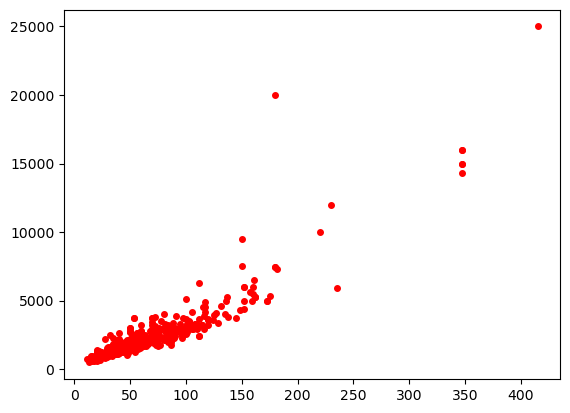

In [9]:
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.show()

Netoyage du dataset. Nous allons retenir uniquement les données n'ayant pas de valeur supérieur à 10 000 

In [11]:
house_data = house_data[house_data['loyer']<10000]

In [12]:
house_data

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
...,...,...
540,1490,48
541,2020,58
542,2050,70
543,1220,42


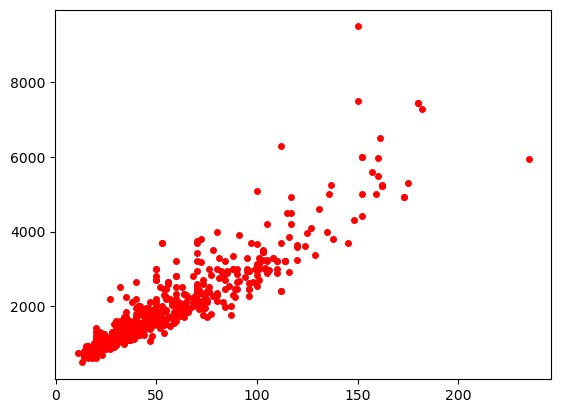

In [13]:
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
plt.show()

Mise en place des donnees d'entrainnement

In [16]:
x = np.matrix([np.ones(house_data.shape[0]), house_data['surface']]).T
x[:10]

matrix([[ 1., 37.],
        [ 1., 32.],
        [ 1., 26.],
        [ 1., 30.],
        [ 1., 70.],
        [ 1., 24.],
        [ 1., 41.],
        [ 1., 67.],
        [ 1., 63.],
        [ 1., 70.]])

In [17]:
y = np.matrix(house_data['loyer']).T
y[:10]

matrix([[1330],
        [1400],
        [ 904],
        [ 955],
        [2545],
        [ 970],
        [1560],
        [1960],
        [2000],
        [2600]], dtype=int64)

In [18]:
# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

print(theta)

[[266.45460292]
 [ 30.66119596]]


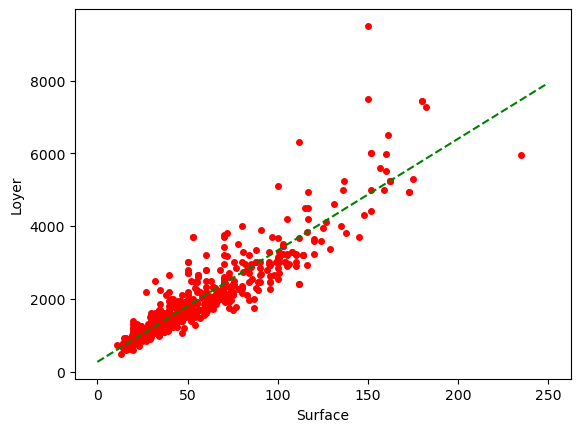

In [25]:
plt.xlabel('Surface')
plt.ylabel('Loyer')

plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='green')

plt.show()

In [28]:
theta.item(0) + theta.item(1) * 3

358.43819079892705